# Stochastic Differential Equations, Quantum Phase Space, and Julia 

$$
\def\julia{\texttt{julia}}
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\vc#1{{\mathbf #1}}
$$

Dr. Ashton Bradley
<br>
ashton.bradley@otago.ac.nz
<br>
http://amoqt.otago.ac.nz

These lectures present an introduction to three related topics:

- _Quantum Phase Space_, where properties of a class of quantum dynamics problems are exploited to develop efficient means of solution using
- _Stochastic Differential Equations_, the numerical and mathematical framework underpinning the rigorous study of stochastic processes. We will use state of the art numerical solvers now available in
- $\julia$, a new language for high-performance technical computing. Solves the two-language problem.

# Topics

## Lecture 1 (50 mins)
- General overview: Quantum Optics and BEC
- Introduction to stochastic processes: Einstein, Langevin
- Wiener process: the fundamental Gaussian, Markov noise

## Lecture 2 (50 mins)
- Stochastic integration
- Stochastic differential equations (SDE's): conceptual
- Quantum phase space: conceptual

## Workshop 1 (1.5 hours)
- Introduction to Julia
- Computational Wiener process: Wiener increments
- Intro to SDE's (numerical)

## Workshop 2 (1 hour)
- Stochastic integration: Ito and Stratonovich
- Convergence: Weak and Strong

## Workshop 3 (1 hour)
- Quantum phase space 
- Quantum applications



## Lecture 1: Introduction to stochastic differential equations
Mathematical formalism of SDE's. 

- Motivation: open quantum systems
- History: Einstein and Langevin
- The Wiener process

References

- Chapter 4 of _Stochastic Methods - a Handbook for the Natural and Social Sciences_, C. W. Gardiner, [4-th edition, Springer, Berlin (2009)](https://www.springer.com/gp/book/9783540707127) 
- _An algorithmic introduction to numerical simulation of stochastic differential equations_, D. J. Higham, [SIAM Review, __43__, 525-546 (2001)](https://epubs.siam.org/doi/abs/10.1137/S0036144500378302)
- _The Quantum World of Ultracold Atoms and Light: Book I: Foundations of Quantum Optics_, C. W. Gardiner and P. Zoller, [Imperial College Press, London (2014)](https://www.worldscientific.com/worldscibooks/10.1142/p941)

<img src="qw1.png" width="200">

# Dynamics: ODE's and PDE's
We are all familiar with solving ODE's and PDE's to understand physical problems. A lot of our progress in understanding observations of nature can be traced to this process. 

<div class="alert alert-block alert-warning">
<font color=blue>
\begin{align}
    \frac{\partial L}{\partial q_i}&=\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{q}_i}\right)\tag{CM}\\
\frac{1}{c^2}\frac{\partial^2 u}{\partial t^2}&=\nabla^2 u \tag{Waves}\\
\frac{\partial u}{\partial t}&=\kappa\nabla^2 u\tag{Heat}\\
        G_{\mu\nu}+\Lambda g_{\mu\nu}&=8\pi T_{\mu\nu}\tag{Spacetime}
\end{align}

## ANZSUP15
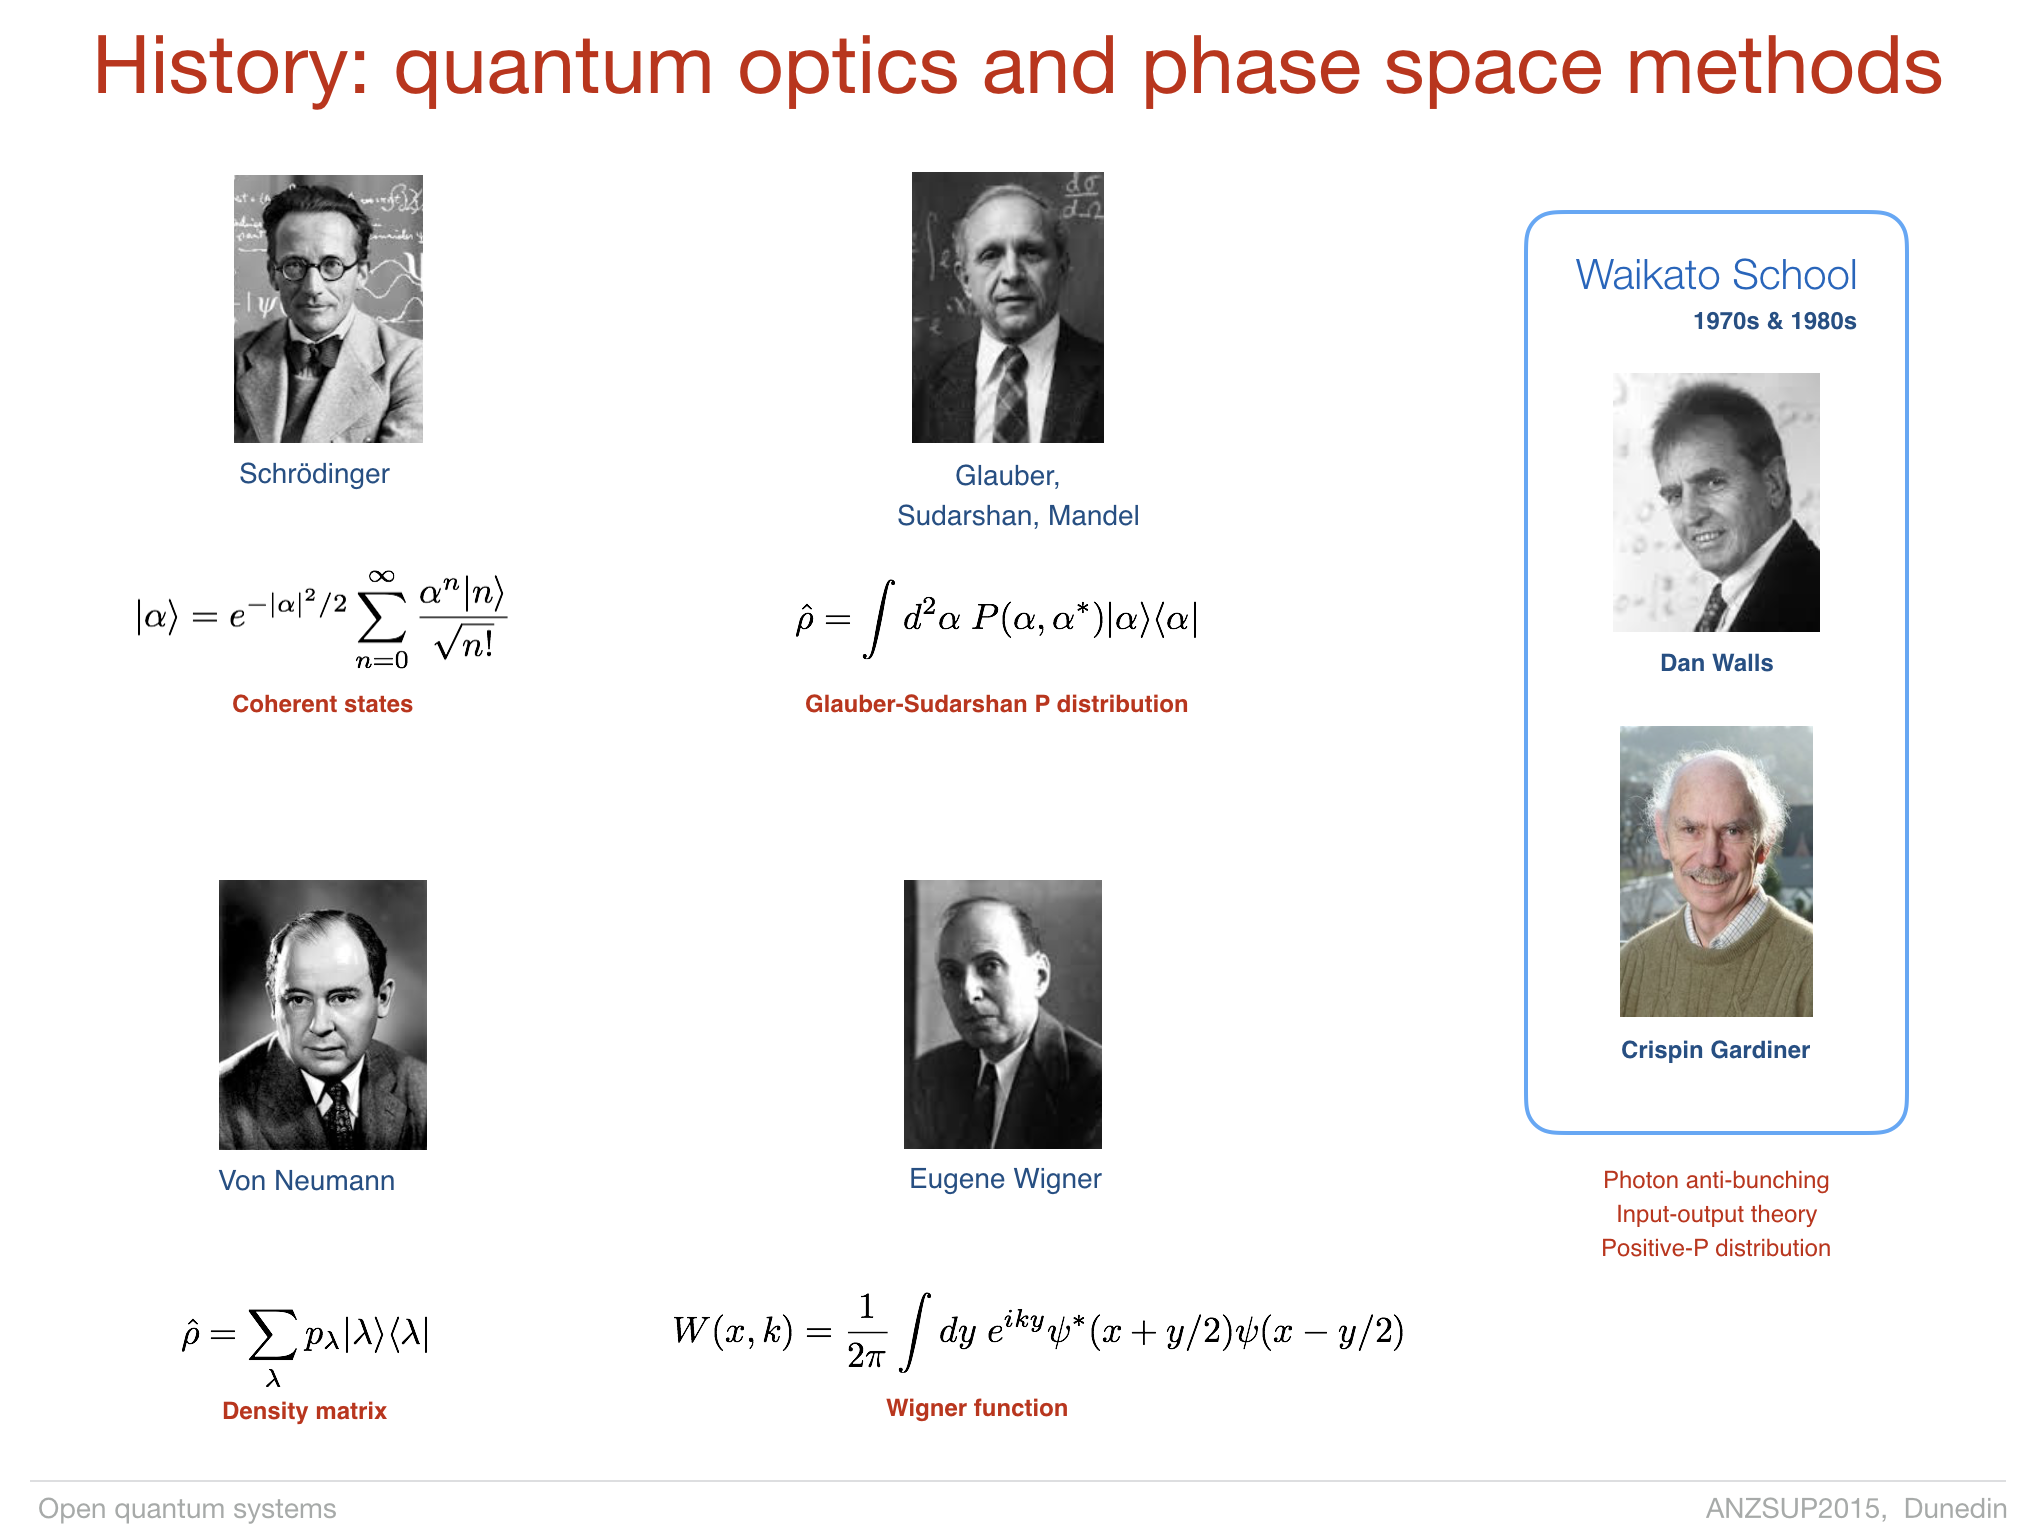

# Quantum optics
- Clear separation between system and reservoir
- Quantitative open systems theory
- ___Dynamical___ theory of system reservoir interactions

<img src="sys-resSmall.png" width="300">

# Ultra-cold gases

- Pristine quantum many-body systems
- Quantum and thermal fluctuations both important
- System/reservoir boundary is much less clear!

$^{87}$Rb BEC forming at Otago (Kjaergaard Light and Matter Lab)
<img src="BECOtago5.png" width="600">

## Rotating thermal cloud

BEC at MIT:
<img src="MITvortlattices.jpg" width="500">

# Dark soliton in trapped BEC
Gross Pitaevskii equation

<div class="alert alert-block alert-warning"><font color=blue>
\begin{align}
i\hbar\frac{\partial \psi}{\partial t}&=\left(-\frac{\hbar^2\nabla^2}{2m}+V(\mathbf{r})+g|\psi|^2\right)\psi\equiv L\psi\tag{Matter waves}
\end{align}
    </font></div>
    
where $g=4\pi\hbar^2 a/m$ is the s-wave interaction strength.

Let's take a 1D example, harmonically trapped.
- Dark soliton is a metastable excitation of the GPE
- Any small dissipation will cause eventual decay

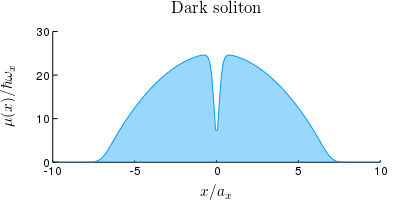

# Dissipative Dynamics: imaginary time
- As a prelude to the full SDE description of open systems, we should first discuss damped evolution _without_ noise. 
- The general problem we face is the description of a subsystem immersed in an _environment_.
- A first attempt at modelling dissipation can be established by simply replacing

\begin{align}
L&\longrightarrow L-\mu\tag{reservoir frame}\\
t&\longrightarrow (1-i\gamma)t\tag{$\gamma\ll 1$}
\end{align}
giving 

<div class="alert alert-block alert-warning">
<font color=blue>
$$i\hbar\frac{\partial \psi}{\partial t}=(1-i\gamma)(L-\mu)\tag{damped GPE}$$
    </font></div>
    
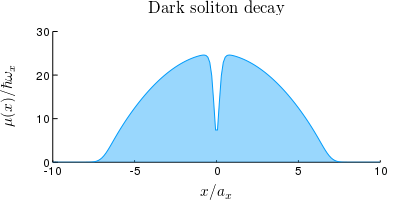

So, where are the fluctuations??

# Stochastic Dynamics: SDE's
The description of any system coupled to an environment will lead naturally to a stochastic differential equation containing both _damping_ and _noise_ terms. 

The system-environment coupling introduces irreversible processes inherent in statistical mechanics. 

Even at absolute zero temperature, quantum vacuum fluctuations often play the role of an environment. An obvioius manifestation of environmental quantum noise is of course the spontaneous emission of a two-level atom. 

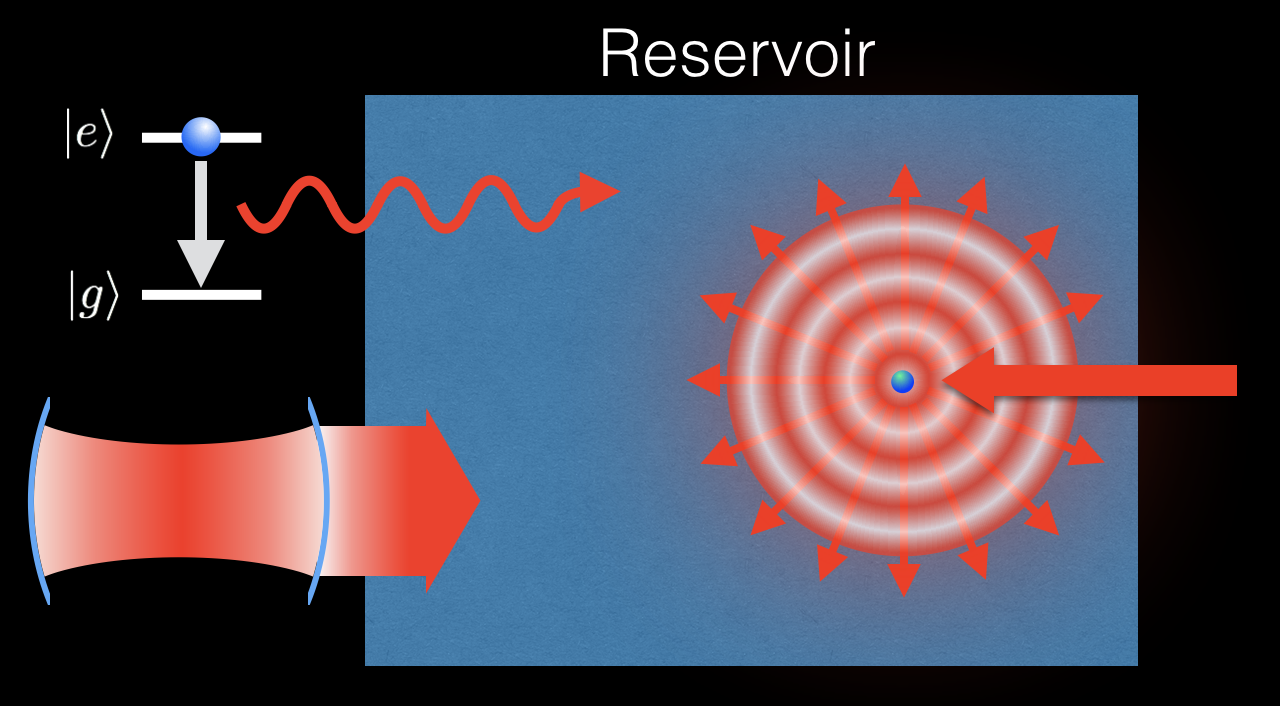

# Stochastic differential equations
Physical motivation and mathematical formalism of SDE's. This lecture will borrow heavily from ___the Gardiner book:___

> Suppose your house is on fire, and you only have time to rescue a single item from the blazing inferno. What item would you choose to save? A Dutch mathematics professor—happily married, with children—instantly replied: ‘‘I would rescue the Gardiner book!’’. This anecdote illustrates at least two points. The first point is that the book by Crispin Gardiner (2004), ‘‘Handbook of Stochastic Methods’’ is a classic text on stochastic differential equations (SDEs). The second point is that the mathematics professor was probably unaware that the out-of-print 1985 edition has been followed up by a 1997 edition, and, most recently, a 2004 edition.
[From online review](https://pdfs.semanticscholar.org/111f/4edebd24439f82a431e4302de897ad3a854a.pdf)

# History: Brownian motion
Brownian motion was first identified in 1827 by [Robert Brown](https://en.wikipedia.org/wiki/Brownian_motion)
- Brown observed random jostling of pollen particles in water under a microscope.
- There was speculation that the jostling could be due to the motion of living creatures.
- Observed to undergo 'random' displacements (due to collisions with water molecules)
- ___Einstein___ showed that this process could be analysed statistically, and derived a _diffusion equation_ governing the time-evolution of the distribution describing the pollen grain's position. The motion was shown to be of _thermal_ origin.

The success of Einstein's explanation was interpreted as giving direct microscopic evidence for the existence of ___atoms___. 

<div class="alert alert-block alert-warning">
<font color=blue>

![Brownian_motion_large.gif](Brownian_motion_large.gif)

By <a href="//commons.wikimedia.org/w/index.php?title=User:Lookang&amp;action=edit&amp;redlink=1" class="new" title="User:Lookang (page does not exist)">Lookang</a> Author of computer model: Francisco Esquembre, Fu-Kwun and lookang - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=19140345">Link</a>
        </font>
    </div>
    


# Fokker-Planck Equation
Given a collection of $n$ Brownian particles immersed in a thermally activated fluid, described by distribution $P(x,t)$ such that

$$\int_{-\infty}^\infty dx\; P(x,t)=n,$$

Einstein showed that under particular assumptions of regularity, the equation of motion for the ___Brownian particle distribution___ can be approximated as

<div class="alert alert-block alert-warning"><font color=blue>
$$\frac{\partial P}{\partial t}=D\frac{\partial^2 P}{\partial x^2}\tag{Fokker-Planck equation}$$
 </font></div>
 
where $D$ is called the diffusion coefficient; the value of $D$ depends upon the microscopic physical processes giving rise to random forces. In general, FPE has form

$$\frac{\partial P(x,t)}{\partial t}=\underbrace{-\frac{\partial }{\partial x}(A(x,t)P(x,t))}_{\textrm{Drift}} + \underbrace{\frac{1}{2}\frac{\partial^2}{\partial x^2}(D(x,t)P(x,t))}_{\textrm{Diffusion}}.$$

In multivariable systems, $A$ becomes a drift ___vector___ and $D$ a diffusion ___matrix___.

## Example: Spreading of a localized droplet
If we introduce a concentrated droplet of dye into the fluid, modelled as the localized initial condition

$$P(x,0)=n\delta(x),$$

the exact solution is (Fourier transfrom the FPE)

<div class="alert alert-block alert-warning"><font color=blue>
$$P(x,t)=\frac{n}{\sqrt{4\pi D t}}e^{-x^2/4Dt},$$
 </font></div>
 
describing a spreading distribution caused by the random jostling, with spatial variance

$$\langle x^2\rangle=\int dx\;P(x,t)x^2 = 2Dt.$$

The rms spatial extent of the droplet $\lambda_x=\sqrt{\langle x^2\rangle}\sim \sqrt{t}$ exhibits the characteristic _diffusive_ scaling with time.

- Although the precise path of each particle remains unknown, we know the exact distribution over space and time
- In quantum mechanics, an analogous development may be made for quantum phase space distributions. 

# Langevin
A complimentary approach to Einstein's, with more direct microscipic construction of the dynamics: 

> "... _infiniment plus simple_" than Einstein's treatment. [Langevin] 

Our aim in these lectures is to show how one can combine the two approaches in the context of quantum mechanics to develop a tractable approach for solving many body quantum dynamics; the approach is also well suited to revealing semi-classical approximations and analytical insights. 

## Langevin equation
- Consider motion of a particle in the fluid
- Viscous drag + fluctuating force due to thermal impacts by fluid molecules.

### Newton's second law
The particle velocity $u(t)$ is assumed to be governed by a naive form of stochastic differential equation 

<div class="alert alert-block alert-warning">
<font color=blue>
$$\frac{du}{dt}=-\gamma u + \sqrt{f}\xi(t),$$
    </font>
    </div>
    
where 

- $\gamma$ is the friction coefficient of the system, which is related to $D$ (we will see how). 

- For a sphere of radius $a$, mass $m$, in fluid of viscousity $\eta$
$$\gamma=\frac{6\pi\eta a}{m}$$
- $\sqrt{f}\xi(t)$ describes random forces (assumed rapidly fluctuating). 
- The force is assumed to have the statistical properties 

<div class="alert alert-block alert-warning">
<font color=blue>
$$\langle \xi(t)\rangle = 0$$
$$\langle \xi(t)\xi(t')\rangle=\delta(t-t'),$$
    </font></div>

namely, that on average the force vanishes, and that the forces at different times are statistically independent. At this point the force strength $f$ is ___unknown___; it turns out to be closely related to $\gamma$, and we will see how to deduce it later (if you find the pathology at $t\to t'$ physically troubling, you are not alone!).

### Formal solution
We can find the formal solution of the Langevin equation as 

<div class="alert alert-block alert-warning">
<font color=blue>
$$ u(t) = u(0)e^{-\gamma t} + \sqrt{f}\int_0^t dt'\;e^{-\gamma(t-t')}\xi(t'),$$
    </font>
    </div>
which turns out to be quite useful, despite the aforementioned issues. 

Before proceeding we emphasize that later we will introduce a rigorous formulation of the SDE that will calrify the nature of the force, and leads to the notion of ___Ito calculus___. For now, we simply use the statistical properties of the noise, and see what can be deduced.

The mean velocity is simply $\langle u(t)\rangle = u(0)e^{-\gamma t},$

and the viscosity damps away the initial flow.

The variance $\langle [u(t)- u(0)e^{-\gamma t}]^2\rangle = [1-e^{-2\gamma t}]f/2\gamma$ (show this!) gives us the result 

$$\langle u(t)^2\rangle = u(0)^2e^{-2\gamma t}+\frac{f}{2\gamma}[1-e^{-2\gamma t}]$$

### Steady state
The physically crucial observation is that the steady state should satisfy the equipartition theorem. For times $t\gg 1/\gamma$, we impose t he steady-state constraint

$$\langle u(t)^2\rangle_s\longrightarrow\frac{f}{2\gamma}=\frac{k_BT}{2}$$

and hence

<div class="alert alert-block alert-warning">
<font color=blue>
$$ f=\frac{2\gamma k_B T}{m}$$
    </font></div>
    
This is an example of the ___fluctuation-dissipation theorem:___

- The fluctuation amplitude $\sqrt{f}$ is related to the dissipatation rate $\gamma$. 
- They are connected by the absolute temperature, and the particle's inertia.
- Importantly, this choice means that the steady state is ___independent___ for the precise value of $\gamma$. Such independence must hold for a steady state described by statistical mechanics. 
- E.g. - the canonical ensemble only depends on the reservoir temperature, not on the details of the coupling between system and reservoir. 
- Microscopic theory of system-reservoir interactions can be developed that rigorously confirms this relationship. 

### Exercise
We can find the spreading of the Langevin paths in space from $x(t)=\int_0^t u(t')dt'$.

a. Show that $\langle x(t)\rangle = \frac{u(0)}{\gamma}(1-e^{-\gamma t})$.

b. Using $\alpha(s)\equiv\sqrt{f}\int_0^s dt\; e^{-\gamma(s-t)}\xi(t)$, show that $g(s,s')\equiv\langle \alpha(s)\alpha(s')\rangle$ is

$$g(s,s')=\frac{f}{2\gamma}e^{-\gamma(s+s')}\left[e^{2\gamma\textrm{min}(s,s')}-1\right]=\frac{f}{2\gamma}\left[e^{-\gamma|s-s'|}-e^{-\gamma(s+s')}\right]$$

c. Hence show that

$$
\langle [x(t)-\langle x(t)\rangle]^2\rangle = \int_0^t ds\int_0^tds'g(s,s')=\frac{ft}{\gamma^2}-(1-e^{-\gamma t})\frac{2f}{\gamma^3}+(1-e^{-2\gamma t})\frac{f}{2\gamma^3}$$

At short times the initial velocity dominates: $\langle x(t)^2\rangle\simeq (u(0)t)^2$; the long-time limit is of particular interest to connect with the FPE. 

### Long-time limit
Recall, from Einstein's Brownian motion FPE, that 

$$\langle x^2\rangle=\int dx\;P(x,t)x^2 = 2Dt.$$

The long-time behavior of $\langle [x(t)-\langle x(t)\rangle]^2\rangle$ can be taken as the _definition_ of the diffusion coefficient

<div class="alert alert-block alert-warning"><font color=blue>
$$D = \lim_{t\to \infty}\frac{\langle (x-\langle x\rangle)^2\rangle}{2t}=\frac{f}{2\gamma^2}=\frac{k_BT}{\gamma m}=\frac{k_BT}{6\pi\eta a}\tag{Einstein}$$
</font></div>
    
Thus we have established an important link between the approaches of Langevin and Einstein.

# Wiener process
The workhorse of stochastic differential equations, the Wiener process provides the fundamental source of noise. 

An understanding of the Wiener process will allow us to define and work with stochastic integrals - also, rather confusingly, known as stochastic differential equations.

- $\xi(t)$ is often used, technically it is not well defined (despite our success using it!)
- What does $\langle \xi(t)\xi(t')\rangle \to \infty$ as $t\to t'$ mean physically?

We might expect, given the $\delta$-correlation, that this object would fair better inside an integral. This is exactly the definition of the ___Wiener process___

<div class="alert alert-block alert-warning"><font color=blue>
$$W(t)\equiv \int_0^t dt'\xi(t')$$
</font></div>

where $\xi(t)$ is required to be Gaussian. We emphasize that the pathology returns as soon as we try to differentiate:

$$\frac{dW}{dt}=\xi(t)$$

is not well defined - Wiener process is ___continuous everywhere___, but ___differentiable nowhere!___

Then we have the first moments

\begin{align}
    \langle W(t)\rangle&=\int_0^t\langle\xi(t')\rangle = 0,\\
    \langle W(t)^2\rangle&=\int_0^t dt'\int_0^t dt'\langle\xi(t')\xi(t)\rangle = t,
\end{align}

and $W(t)$ is Gaussian, with mean zero and unit variance, with probability density

\begin{align}
p(w,t|0,0)dw &\equiv \textrm{Prob.} \quad w<W(t)<w+dw\notag\\
&=\frac{1}{\sqrt{2\pi t}}e^{-w^2/2t}dw \tag{Diffusion}
\end{align}

Note that this is precisely the solution of the localized droplet diffusion problem, for $D=1/2$. This is the fundamental Gaussian diffusion process from which all others are constructed. 

In general, if $W(t_0)=w_0$, then $W(t)=w_0 + \int_{t_0}^t dt'\xi(t')$, with conditional probability distribution

<div class="alert alert-block alert-warning"><font color=blue>
$$ p(w,t|w_0,t_0)=\frac{1}{\sqrt{2\pi(t-t_0)}}\exp{\left(-\frac{(w-w_0)^2}{2(t-t_0)}\right)}$$
</font></div>

Notice that $p(w,t|w_0,t_0)\to\delta(w-w_0)$ as $t\to t_0$. Hence, knowledge of $W(t_0)$ completely determines $p$ at all $t>t_0$. 

__Exercise:__ show that the diffusion solution satisfies

$$\frac{\partial p(w,t|0,0)}{\partial t}=\frac{1}{2}\frac{\partial^2 p(w,t|0,0)}{\partial w^2}$$

__Exercise:__ prove that 

$$ p(w,t|w_0,t_0)=\int dw_1 p(w,t|w_1,t_1)p(w_1,t_1|w_0,t_0)$$

provided $t>t_1>t_0$. This is a more formal demonstration of the ___Markov property___.

# Brownian paths
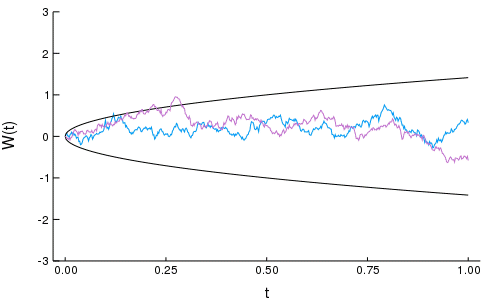

Next time:
- Wiener increments: discrete approxmation to $dW/dt$ works fine!
- Stochastic integration
- Ito rules
- Quantum phase space


In [3]:
randn()

-0.008674443657986058